# 极坐标

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Polar Bar Chart


In [ ]:
rng = np.random.default_rng(123)

data = pd.DataFrame(
    {
        "name": [f"item {i}" for i in range(1, 51)],
        "value": rng.integers(low=30, high=100, size=50),
        "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8,
    }
)

data.head()

,name,value,group
0,item 1,31,A
1,item 2,77,A
2,item 3,71,A
3,item 4,33,A
4,item 5,93,A


In [3]:
data_sorted = (
    data.groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending=False), include_groups=False)
    .reset_index(drop=True)
)

data_sorted.head()

,name,value
0,item 5,93
1,item 2,77
2,item 3,71
3,item 9,53
4,item 7,47


In [ ]:
from typing import Any, Literal


def get_label_rotation(angle, offset) -> tuple[Any, Literal["right", "left"]]:
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    return rotation, alignment

In [5]:
def add_labels(ax, angles, values, labels, offset) -> None:
    # This is the space between the end of the bar and the label
    padding = 4

    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label in zip(angles, values, labels):
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor",
        )

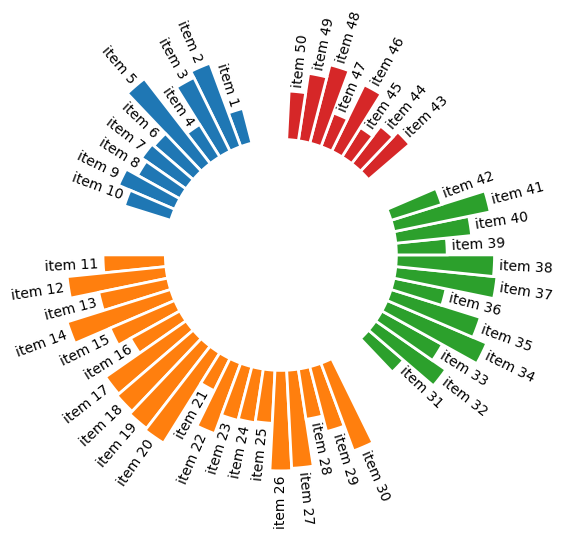

In [6]:
OFFSET = np.pi / 2

GROUP = data["group"].array
VALUES = data["value"].array
LABELS = data["name"].array

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

_, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": "polar"})

ax.set(ylim=(-100, 100), xticks=[], yticks=[], theta_offset=OFFSET, frame_on=False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)


GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, edgecolor="white", linewidth=2)

add_labels(ax, ANGLES[IDXS], VALUES, LABELS, OFFSET)

## Polar Scatter Chart


<Figure size 1000x800 with 0 Axes>

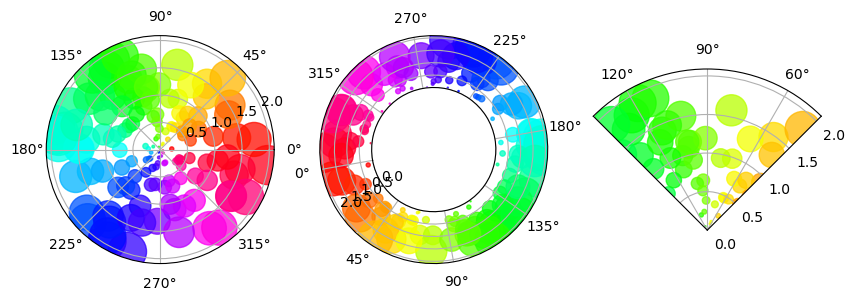

In [7]:
n_point = 150

r = 2 * np.random.rand(n_point)
theta = 2 * np.pi * np.random.rand(n_point)

area = 200 * r**2  # area of each circle representing each data point
colors = theta
cmap = "hsv"
alpha = 0.75

plt.figure(figsize=(10, 8))

_, axes = plt.subplots(1, 3, figsize=(10, 6), subplot_kw={"projection": "polar"})

axes[0].scatter(theta, r, c=colors, s=area, cmap=cmap, alpha=alpha)

axes[1].scatter(theta, r, c=colors, s=area, cmap=cmap, alpha=alpha)
axes[1].set(rorigin=-2.5)
axes[1].set_theta_zero_location("W", offset=10)

axes[2].scatter(theta, r, c=colors, s=area, cmap=cmap, alpha=alpha)
axes[2].set(thetamin=45, thetamax=135)

plt.show()

## Dotnut


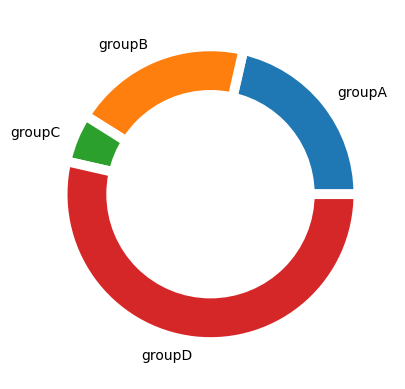

In [8]:
names = ["groupA", "groupB", "groupC", "groupD"]
size = [12, 11, 3, 30]

plt.pie(size, labels=names, wedgeprops={"linewidth": 7, "edgecolor": "white"})

my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gca().add_artist(my_circle)
plt.show()

## Radar


In [9]:
data = pd.DataFrame(
    {
        "group": ["A", "B", "C", "D"],
        "var1": [38, 1.5, 30, 4],
        "var2": [29, 10, 9, 34],
        "var3": [8, 39, 23, 24],
        "var4": [7, 31, 33, 14],
        "var5": [28, 15, 32, 14],
    }
)

data.head()

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [10]:
data.loc[0].drop("group").array

<NumpyExtensionArray>
[np.float64(38.0), np.int64(29), np.int64(8), np.int64(7), np.int64(28)]
Length: 5, dtype: object

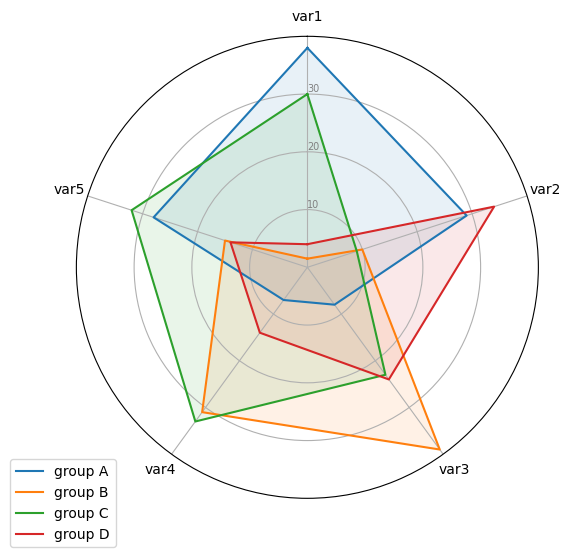

In [11]:
# number of variable
categories = data.columns[1:]
N = len(categories)

angles = [n / N * 2 * np.pi for n in range(N)]
angles += angles[:1]

_, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": "polar"})

ax.set(
    theta_offset=np.pi / 2,
    theta_direction=-1,
    rlabel_position=0,
    ylim=(0, 40),
    xticks=angles[:-1],
    xticklabels=categories,
    yticks=[10, 20, 30],
)

plt.setp(ax.get_yticklabels(), color="grey", size=7)

for ind, cat in enumerate(data.group):
    values = data.loc[ind].drop("group").array.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"group {cat}")
    ax.fill(angles, values, alpha=0.1)

ax.legend(bbox_to_anchor=(0.1, 0.1))
plt.show()